<a href="https://colab.research.google.com/github/amul-dhungel/Tensorflow_ChickenSoup/blob/main/Neural_Network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


**Tensors and Numpy**

In [ ]:
num_array = np.array([1.,2.,3.])
tensor_array = tf.constant(num_array)
tensor_arrays = np.array(tensor_array)
tensor_arrays

array([1., 2., 3.])

In [ ]:
# Create a random numbers
X = tf.cast(tf.range(-100,100,4),dtype=float)

# Create a Y range of numbers
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
        86.,  90.,  94.,  98., 102., 106.], dtype=float32)>

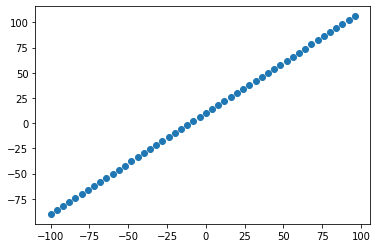

In [ ]:
# Plot the above data of X and Y in graph
plt.scatter(X,Y)

In [ ]:
# The 3 sets
#Split the data into train and test sets

X_train = X[:40] # first 40 are training samples (80 % of the data)
Y_train = Y[ :40]

X_test = X[40:]
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

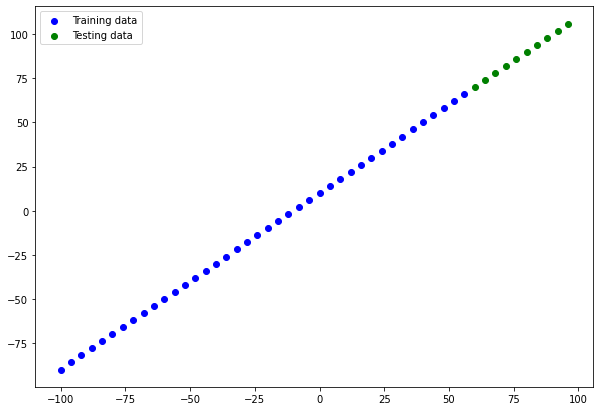

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train,Y_train, c="b", label = "Training data")
# Plot test data in green
plt.scatter(X_test,Y_test, c="g", label="Testing data")
plt.legend()

In [ ]:
# Build a neural network through keras

# 1. Create a model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(1)                       
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. FIt the model with data
model.fit(X_train, Y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 39.3107 - mae: 39.3107
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 32.2207 - mae: 32.2207
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 23.9075 - mae: 23.9075
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 6.0300 - mae: 6.0300
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 16.6076 - mae: 16.6076
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 4.8919 - mae: 4.8919
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 13.5533 - mae: 13.5533
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 6.6811 - mae: 6.6811
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 15.4660 - mae: 15.4660
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.3817 - mae: 10.3817
Epoch 11/100
2/2 [==============================] - 0s 8ms/step

In [ ]:
model.predict([4.0])

array([[6.0361996]], dtype=float32)

In [ ]:
model.summary()
Y_predict = model.predict(X_test)
Y_predict

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


array([[ 76.53416 ],
       [ 81.609375],
       [ 86.68457 ],
       [ 91.75978 ],
       [ 96.834984],
       [101.91019 ],
       [106.9854  ],
       [112.0606  ],
       [117.13582 ],
       [122.21101 ]], dtype=float32)

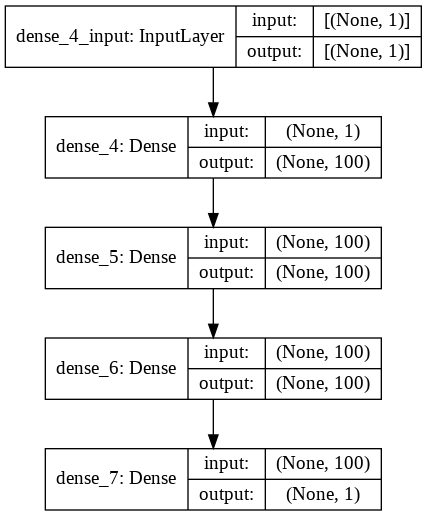

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(model = model , show_shapes=True)

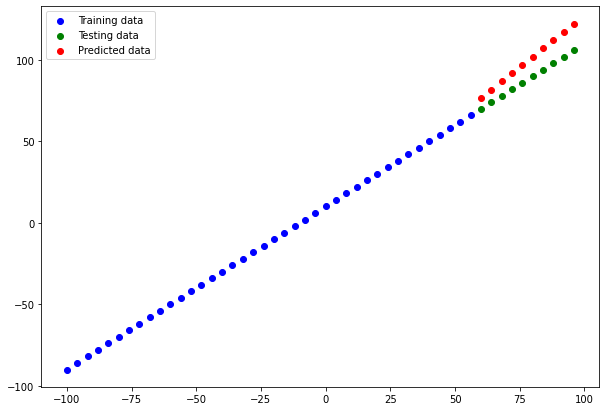

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train,Y_train, c="b", label = "Training data")
# Plot test data in green
plt.scatter(X_test,Y_test, c="g", label="Testing data")
# Plot predicted in red
plt.scatter(X_test,Y_predict, c="r", label ="Predicted data" )
plt.legend()

In [ ]:
model.predict([17])

array([[21.975708]], dtype=float32)

# Regression with Real World Dataset (Insurance)

In [ ]:
# Import required librarires
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Lets try one-hot encode our dataframe so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)

X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [ ]:
# View x
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
len(X), len(X_train), len (X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network from keral model
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mse"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

In [ ]:
# Check the result of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mse: 111577840.0000


[7023.3291015625, 111577840.0]

Improve the model

To imporve our model, we will run 2 experiment
1. Add an extra layer with more hidden units or change optimizers SGD, ADAM
2. Train for longer epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
insurance_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)                                    
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
insurance_model_2.fit(X_train,y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12353.0242 - mae: 12353.0242
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7732.2964 - mae: 7732.2964
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - mae:

In [ ]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
insurance_model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)                                    
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
historyVisualize = insurance_model_3.fit(X_train,y_train, epochs=200)

In [ ]:
# Evalute our third model
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

Text(0.5, 0, 'epochs')

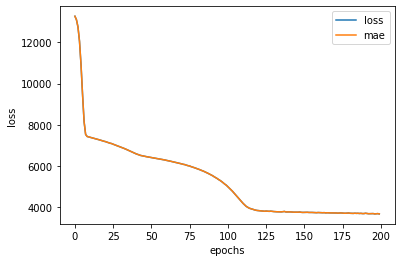

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(historyVisualize.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)